<a href="https://colab.research.google.com/github/CAVASOL/witt/blob/main/artifact/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Albumentations

In [ ]:
%matplotlib inline

In [ ]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [ ]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_max), int(y_min), int(y_max)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [ ]:
# Load the image from the disk
image = cv2.imread('datasets/train/Bear/12543cb664a87734.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
bboxes = [[193.495266,178.56, 404.289556, 398.08],[223.60873600000002, 527.36, 463.235188, 993.92]]
category_ids = [0,0]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'Bear'}

In [ ]:
# Augmentation pipeline1
transform1 = A.Compose([
    A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))

In [ ]:
# Augmentation pipeline2
transform2 = A.Compose([
    A.HorizontalFlip(p=1),
    A.RandomBrightnessContrast(p=0.4),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))

In [ ]:
# Augmentation pipeline3
transform3 = A.Compose([
    A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.6),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))

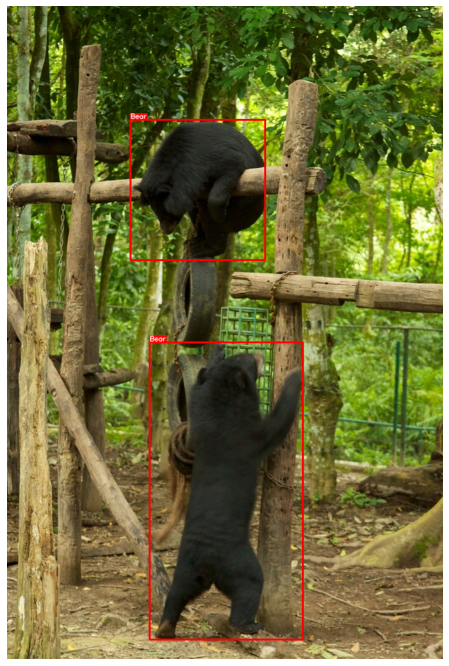

In [ ]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [ ]:
transformed = transform1(image=image, bboxes=bboxes, category_ids=category_ids)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

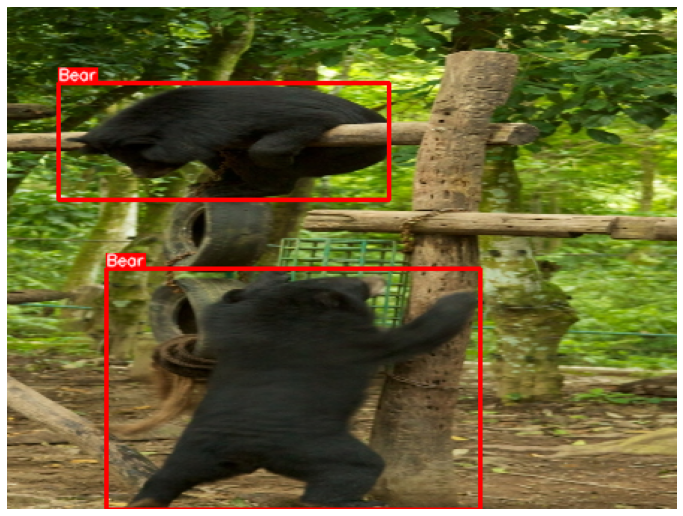

In [ ]:
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

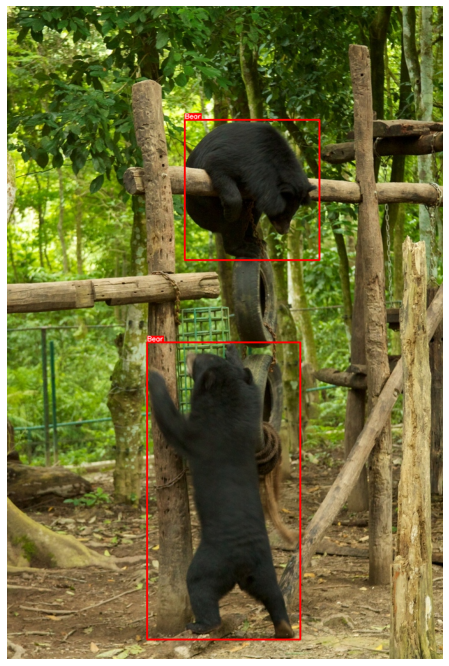

In [ ]:
transformed = transform2(image=image, bboxes=bboxes, category_ids=category_ids)

visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

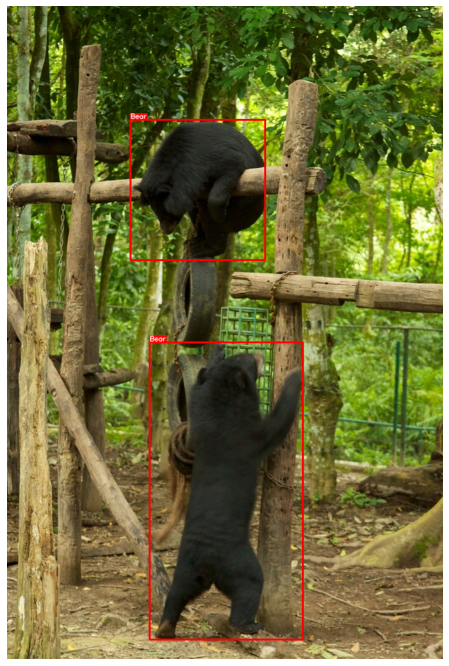

In [ ]:
transformed = transform3(image=image, bboxes=bboxes, category_ids=category_ids)

visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

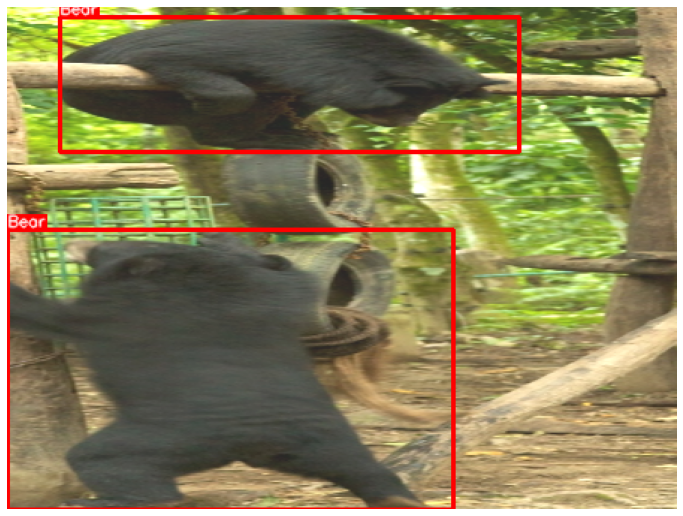

In [ ]:
transformed = transform4(image=image, bboxes=bboxes, category_ids=category_ids)

visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [ ]:
f=open('yolo/train/labels/12543cb664a87734.txt','r')
f.readlines()

['0 0.437617 0.2815625 0.30863 0.21437499999999998\n',
 '0 0.502814 0.7428125 0.35084399999999993 0.45562499999999995\n']

In [ ]:
transform = A.Compose([
    A.RandomCrop(width=450, height=450),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='yolo'))
transformed = transform(image=image, bboxes=bboxes)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

In [ ]:
import cv2
def draw_boxes(image, bboxes, format='coco'):
    """
    Function accepts an image and bboxes list and returns
    the image with bounding boxes drawn on it.
    Parameters
    :param image: Image, type NumPy array.
    :param bboxes: Bounding box in Python list format.
    :param format: One of 'coco', 'voc', 'yolo' depending on which final
        bounding noxes are formated.
    Return
    image: Image with bounding boxes drawn on it.
    box_areas: list containing the areas of bounding boxes.
    """
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    box_areas = []
    if format == 'coco':
        # coco has bboxes in xmin, ymin, width, height format
        # we need to add xmin and width to get xmax and...
        # ... ymin and height to get ymax
        for box_num, box in enumerate(bboxes):
            xmin = int(box[0])
            ymin = int(box[1])
            xmax = int(box[0])+int(box[2])
            ymax = int(box[1])+int(box[3])
            width = int(box[2])
            height = int(box[3])
            cv2.rectangle(
                image,
                (xmin, ymin), (xmax, ymax),
                color=(0, 0, 255),
                thickness=2
            )
            box_areas.append(width*height)
    if format == 'voc':
        for box_num, box in enumerate(bboxes):
            xmin = int(box[0])
            ymin = int(box[1])
            xmax = int(box[2])
            ymax = int(box[3])
            width = xmax - xmin
            height = ymax - ymin
            cv2.rectangle(
                image,
                (xmin, ymin), (xmax, ymax),
                color=(0, 0, 255),
                thickness=2
            )
            box_areas.append(width*height)
    if format == 'yolo':
        # need the image height and width to denormalize...
        # ... the bounding box coordinates
        h, w, _ = image.shape
        for box_num, box in enumerate(bboxes):
            x1, y1, x2, y2 = yolo2bbox(box)
            # denormalize the coordinates
            xmin = int(x1*w)
            ymin = int(y1*h)
            xmax = int(x2*w)
            ymax = int(y2*h)
            width = xmax - xmin
            height = ymax - ymin
            cv2.rectangle(
                image,
                (xmin, ymin), (xmax, ymax),
                color=(0, 0, 255),
                thickness=2
            )
            box_areas.append(width*height)
    return image, box_areas

In [ ]:
def yolo2bbox(bboxes):
    """
    Function to convert bounding boxes in YOLO format to
    xmin, ymin, xmax, ymax.

    Parmaeters:
    :param bboxes: Normalized [x_center, y_center, width, height] list
    return: Normalized xmin, ymin, xmax, ymax
    """
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

## Visualization

In [ ]:
# Import the required libraries
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes

# read input image from your computer
img = read_image('yolo/train/images/12543cb664a87734.jpg')

# create boxes
box_1 = [330, 220, 450, 350]
box_2 = [530, 200, 650, 320]
box = [box_1, box_2]
box = torch.tensor(box, dtype=torch.int)

# draw bounding box and fill color
img = draw_bounding_boxes(img, box, width=5, colors=[
                          "orange", "blue"], fill=True)

# transform this image to PIL image
img = torchvision.transforms.ToPILImage()(img)

# display output
img.show()

In [ ]:
LABEL_FOLDER = '/home/witt95573/animals_detection/yolo/train/labels/12543cb664a87734.txt'  # Put the label files in this folder. 检测结果存放文件夹labels路径
RAW_IMAGE_FOLDER = '/home/witt95573/animals_detection/yolo/train/images/12543cb664a87734.jpg'

In [ ]:
!cp ./yolo/train/labels/12543cb664a87734.txt ./draw-YOLO-box/labels/

In [ ]:
!cp ./yolo/train/images/12543cb664a87734.jpg ./draw-YOLO-box/raw_images/

In [ ]:
http://34.47.70.110:8080/view/animals_detection/yolo/train/images/12543cb664a87734.jpg
http://34.47.70.110:8080/view/animals_detection/draw-YOLO-box/save_image/12543cb664a87734.jpg
http://34.47.70.110:8080/view/animals_detection/datasets/train/Bear/12543cb664a87734.jpg
http://34.47.70.110:8080/edit/animals_detection/datasets/train/Bear/Label/12543cb664a87734.txt